# Traffic Signal Classification

In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import random

In [3]:
with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [7]:
train['features'].shape

(34799, 32, 32, 3)

In [9]:
X_train = train['features']
y_train = train['labels']

In [10]:
X_test = test['features']
y_test = test['labels']

In [11]:
X_val = valid['features']
y_val = valid['labels']

In [12]:
X_train.shape

(34799, 32, 32, 3)

In [15]:
y_train.shape

(34799,)

In [13]:
X_test.shape

(12630, 32, 32, 3)

In [14]:
X_val.shape

(4410, 32, 32, 3)

31

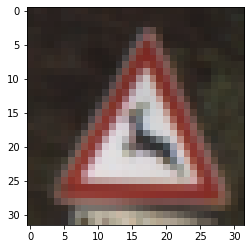

In [18]:
plt.imshow(X_train[500])
y_train[500]

In [34]:
del ax

41

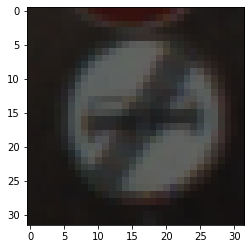

In [45]:
plt.imshow(X_train[22])
y_train[22]

38
17
35
11
8


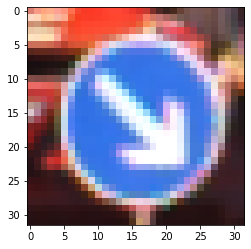

<Figure size 432x288 with 0 Axes>

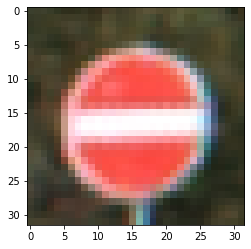

<Figure size 432x288 with 0 Axes>

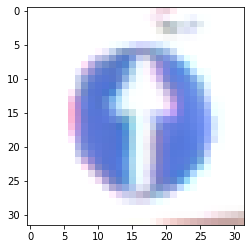

<Figure size 432x288 with 0 Axes>

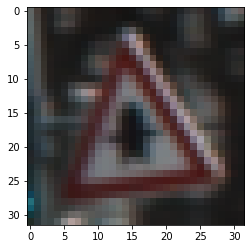

<Figure size 432x288 with 0 Axes>

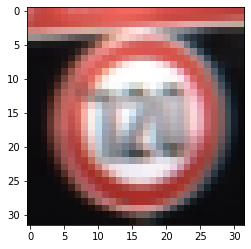

<Figure size 432x288 with 0 Axes>

In [59]:
for i in range(5):
    r = random.randint(1,34799)
    plt.figure(figsize=(4,4))
    plt.imshow(X_train[r])
    plt.figure()
    print(y_train[r])

In [60]:
from sklearn.utils import shuffle

In [61]:
X_train, y_train = shuffle(X_train , y_train)

In [69]:
X_train.shape

(34799, 32, 32, 3)

In [71]:
X_train_gray = np.average(X_train , axis= 3)

In [72]:
X_train_gray.shape

(34799, 32, 32)

In [74]:
X_test_gray = np.average(X_test , axis= 3)
X_val_gray = np.average(X_val , axis= 3)

In [76]:
X_test_gray.shape

(12630, 32, 32)

18
25
38
8
14


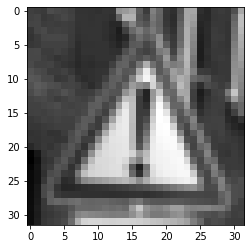

<Figure size 432x288 with 0 Axes>

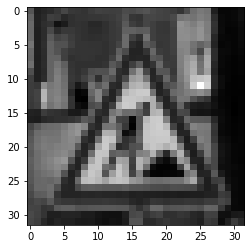

<Figure size 432x288 with 0 Axes>

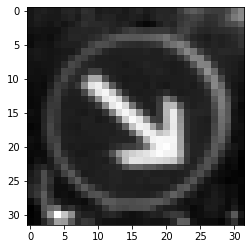

<Figure size 432x288 with 0 Axes>

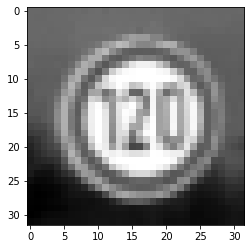

<Figure size 432x288 with 0 Axes>

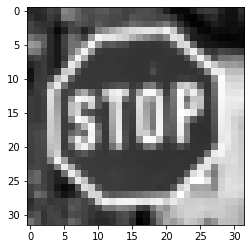

<Figure size 432x288 with 0 Axes>

In [79]:
for i in range(5):
    r = random.randint(1,34799)
    plt.figure(figsize=(4,4))
    plt.imshow(X_train_gray[r],cmap='gray')
    plt.figure()
    print(y_train[r])

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
minmax = MinMaxScaler()

In [85]:
# X_train_gray_scale = scaler.fit_transform(X_train_gray)

In [86]:
# X_train_gray_norm = minmax.fit_transform(X_train_gray)

In [92]:
from keras.models import Sequential

In [93]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [147]:
del cnn

In [148]:
cnn = Sequential()

In [149]:
cnn.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu'))
cnn.add(AveragePooling2D())
cnn.add(Conv2D(filters=16, kernel_size=(5,5)))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(units=400, activation='relu'))
cnn.add(Dense(units=100, activation='relu'))
cnn.add(Dense(units=43, activation='softmax'))

In [150]:
cnn.compile(loss = 'sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [129]:
X_val_gray.shape

(4410, 32, 32)

In [130]:
X_train_gray = X_train_gray.reshape(34799,32,32,1)
X_val_gray = X_val_gray.reshape(4410,32,32,1)

In [151]:
cnn.fit(X_train_gray,y_train,batch_size=500,epochs= 10, validation_data=(X_val_gray,y_val))

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 20s 571us/step - loss: 5.2980 - accuracy: 0.3183 - val_loss: 1.7804 - val_accuracy: 0.5837
Epoch 2/10
34799/34799 [==============================] - 20s 577us/step - loss: 0.9271 - accuracy: 0.7836 - val_loss: 0.9538 - val_accuracy: 0.7839
Epoch 3/10
34799/34799 [==============================] - 20s 570us/step - loss: 0.4253 - accuracy: 0.9025 - val_loss: 0.7965 - val_accuracy: 0.8259
Epoch 4/10
34799/34799 [==============================] - 19s 546us/step - loss: 0.2604 - accuracy: 0.9431 - val_loss: 0.7856 - val_accuracy: 0.8440
Epoch 5/10
34799/34799 [==============================] - 19s 548us/step - loss: 0.1809 - accuracy: 0.9611 - val_loss: 0.6942 - val_accuracy: 0.8576
Epoch 6/10
34799/34799 [==============================] - 19s 542us/step - loss: 0.1320 - accuracy: 0.9724 - val_loss: 0.6632 - val_accuracy: 0.8655
Epoch 7/10
34799/34799 [==============================] -